<a href="https://colab.research.google.com/github/BradleyGS1/TensorFlow-Developer-Cert/blob/master/Tensorflow_Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to CNN and Computer Vision

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-18 01:22:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   154MB/s    in 0.7s    

2023-02-18 01:22:17 (154 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Inspect data directory
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [5]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
# Visualise training data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target folder
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and then plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  # Display shape of image
  print(f"Image shape: {img.shape}")

  return img

['3464027.jpg']
Image shape: (512, 512, 3)


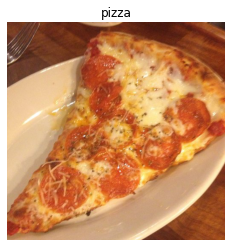

In [22]:
# View random image from the training dataset
img = view_random_image(
  target_dir="pizza_steak/train/",
  target_class="pizza"
)

In [25]:
# Get train and testing data
# Normalise pixel values between [0, 1], ie divide by 255

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to training and test data in directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and put into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
# Create CNN model

input = tf.keras.layers.Input(shape=(224, 224, 3))

x = tf.keras.layers.Conv2D(16, (5, 5), activation="relu")(input)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(32, (5, 5), activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(32, (4, 4), activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(16, (4, 4), activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(4, (4, 4), activation="relu")(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(16, activation="relu")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=[input], outputs=[output])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 16)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 32)      12832     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 32)        1641

In [30]:
# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
# Fit model to train data
history = model.fit(train_data, epochs=10)

Epoch 1/10
47/47 [==============================] - 144s 3s/step - loss: 0.6485 - accuracy: 0.6120
Epoch 2/10
47/47 [==============================] - 139s 3s/step - loss: 0.5595 - accuracy: 0.7320
Epoch 3/10
47/47 [==============================] - 135s 3s/step - loss: 0.5088 - accuracy: 0.7653
Epoch 4/10
47/47 [==============================] - 137s 3s/step - loss: 0.4657 - accuracy: 0.7947
Epoch 5/10
47/47 [==============================] - 133s 3s/step - loss: 0.4206 - accuracy: 0.8127
Epoch 6/10
47/47 [==============================] - 140s 3s/step - loss: 0.3891 - accuracy: 0.8233
Epoch 7/10
47/47 [==============================] - 133s 3s/step - loss: 0.3891 - accuracy: 0.8353
Epoch 8/10
47/47 [==============================] - 135s 3s/step - loss: 0.3805 - accuracy: 0.8420
Epoch 9/10
47/47 [==============================] - 133s 3s/step - loss: 0.3455 - accuracy: 0.8513
Epoch 10/10
 5/47 [==>...........................] - ETA: 1:55 - loss: 0.2562 - accuracy: 0.9062